**Taller Modulo 10 Pandas**

**Nombre** Yibel Jasbleidy Morales Rey

CC 1013689724

In [2]:
!pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sodapy import Socrata

# 1. **Cargar el Dataset**






La primera forma se cargaron los datos desde un csv, se descargó el archivo en csv y se subió en drive:

---

[link del documento drive TRM en csv](https://drive.google.com/file/d/1mOdv8iRGc0jZEkRA7vmC252mmkB5BlZT/view?usp=drive_link)

In [ ]:
#Primera forma de cargarla
datos=pd.read_csv('/content/TRM.csv')
datos

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,4761.64,COP,22/12/2022,22/12/2022
1,4781.28,COP,20/12/2022,20/12/2022
2,4802.48,COP,17/12/2022,19/12/2022
3,4836.24,COP,13/12/2022,13/12/2022
4,4815.99,COP,10/12/2022,12/12/2022
...,...,...,...,...
7570,4408.65,COP,31/05/2023,31/05/2023
7571,4434.09,COP,01/06/2023,01/06/2023
7572,4410.49,COP,02/06/2023,02/06/2023
7573,4355.80,COP,03/06/2023,05/06/2023


La segunda forma se cargó desde socrata directamente se suben los datos en linea desde la página web:

In [ ]:
#Segunda forma en Socrata
#Dirección de la pagina
cliente=Socrata('www.datos.gov.co', None)

In [ ]:
#Se agrega el identificador
result=cliente.get('k4ki-fcqi')

In [ ]:
#Convertir los datos al dataframe
datos=pd.DataFrame.from_records(result)
datos.head()

""


Se hizo el proceso de pasar los valores de la columna "valor" que estan en object a flotantes

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   valor          1000 non-null   object
 1   unidad         1000 non-null   object
 2   vigenciadesde  1000 non-null   object
 3   vigenciahasta  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [ ]:
#columna_numerica = pd.to_numeric(datos['limite_menor_cuantia'], errors='coerce')
#columna_numerica = columna_numerica.dropna().astype(float)
valor=pd.to_numeric(datos['valor'],errors='coerce')
print(valor)

0      4761.64
1      4781.28
2      4802.48
3      4836.24
4      4815.99
        ...   
995    1978.63
996    1993.85
997    1998.60
998    2017.38
999    2034.86
Name: valor, Length: 1000, dtype: float64


# 2. **Calcular:**

Para este punto se tomaron los datos cargados en csv ya que estan directamente en flotante sin necesidad de hacer algún procedimiento.

In [ ]:
#Media
print('El valor de la media es:',datos.VALOR.mean())

El valor de la media es: 2209.9094732673266


In [ ]:
#Mediana
print('El valor de la mediana es:', datos.VALOR.median())

El valor de la mediana es: 2158.72


In [ ]:
#Desviación estandar
datos.VALOR.std()

947.0299821325272

In [ ]:
#Maximo
datos.VALOR.max()

5061.21

In [ ]:
#Minimo
datos.VALOR.min()

620.62

In [ ]:
#Rango
print('El valor del rango es:',round(datos.VALOR.max(),3)-round(datos.VALOR.min(),3))


El valor del rango es: 4440.59


# 3. Presentar el resumen de los datos númericos


In [ ]:
#Método describe
datos.describe()

,VALOR
count,7575.000000
mean,2209.909473
std,947.029982
min,620.620000
25%,1752.385000
50%,2158.720000
75%,2867.505000
max,5061.210000


# 4. Presentar la información general del dataset

In [ ]:
#Método info
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7575 entries, 0 to 7574
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VALOR          7575 non-null   float64
 1   UNIDAD         7575 non-null   object 
 2   VIGENCIADESDE  7575 non-null   object 
 3   VIGENCIAHASTA  7575 non-null   object 
dtypes: float64(1), object(3)
memory usage: 236.8+ KB


# **Análisis del dataframe TRM**

Al cargar los datos desde un csv, se ordenan automáticante y los toma como un número,por ello en el punto 4 cuando se usa el metodo info, la columna de valor del dataset aparece como un flotante.

A diferencia de cargarse los datos desde socrata, los datos originales de la página, python los toma como un objeto, por ello debe hacer una conversión a números flotantes.

# 5. Hacer dos gráficas

Text(0.5, 1.0, 'Diagrama de cajas')

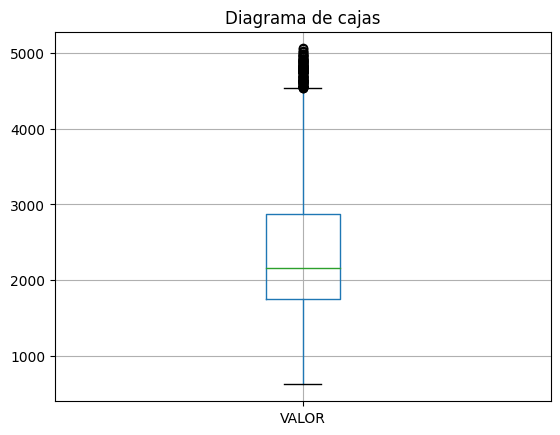

In [ ]:
datos.boxplot()
plt.title('Diagrama de cajas')

**Análisis**
El diagrama de cajas nos indica que el precio histórico del dolar más bajo en colombia fue de $620,62 pesos.

Se registra valores atipicos con el precio del dolar,los precios en los últimos años son de $4000 pesos en adelante, el valor mas alto fue de 5061.21 pesos, lo cual puede indicar que este precio es reciente, y se debe a la crisis económica y politica que enfrenta el pais, debido al conflicto de guerra que existe en uncrania y Rusia y la inflación de Estados Unidos.

La linea de Color verde del diagrama, nos indica que el promedio histórico del dolar en Colombia ha sido de $2.200 Cop aproximadamente.

Axes(0.125,0.11;0.775x0.77)


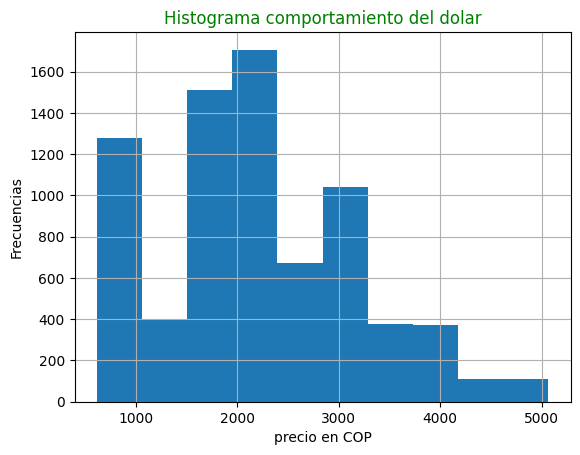

In [ ]:
print(datos.VALOR.hist())
plt.title('Histograma comportamiento del dolar',color='green')
plt.xlabel('precio en COP')
plt.ylabel('Frecuencias')
plt.show()

**Análisis**

Está gráfica muestra el comportamiento del dolar donde el precio de 2.000 cop fue el mas recurrente en el mercado, el
dolar fue incrementando a partir el año 2022 con más de $4.800 cop,por ende su frecuencia no ha sido tan alta comparado a otros precios mas bajos ya que es un precio histórico en la economia Colombiana que se presentó recientemente.
Este histograma nos ayuda a observar las frecuencias de cada peso del dolar

# 6. Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia

Se escogió un dataset de las 1000 empresas más grandes de Colombia https://www.datos.gov.co/Econom-a-y-Finanzas/1000-Empresas-mas-grandes-del-pa-s/8hn7-rpp8


In [ ]:
#Dirección de la pagina
cliente=Socrata('www.datos.gov.co', None)
#Se agrega el identificador
result=cliente.get('8hn7-rpp8')
#Convertir los datos al dataframe
df_empre=pd.DataFrame.from_records(result)
df_empre.head()

,no,nit,razon_social,supervisor,regi_n,departamento_domicilio,ciudad_domicilio,ciiu,macrosector,ingresos_operacionales_2018,ganancia_perdida_2018,total_activos_2018,total_pasivos_2018,total_patrimonio_2018,ingresos_operacionales_2017,ganancia_perdida_2017,total_activos_2017,total_pasivos_2017,total_patrimonio_2017,grupo_en_niif
0,1,899999068,ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,B0610 - Extracción de petróleo crudo,MINERO-HIDROCARBUROS,62579849000.00,11556405000.00,113761823000.00,56548216000.00,57213607000.00,49687082000.00,6620412000.00,107549026000.00,59650395000.00,47898631000.00,NIIF PLENAS-GRUPO 1
1,2,830095213,ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,G4661 - Comercio al por mayor de combustibles ...,COMERCIO,14879440281.00,133741350.00,5488095686.00,3525498461.00,1962597225.00,12493256560.00,195281207.00,3863475148.00,2186212118.00,1677263030.00,NIIF PLENAS-GRUPO 1
2,3,900112515,REFINERIA DE CARTAGENA S.A.S.,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,C1921 - Fabricación de productos de la refinac...,MANUFACTURA,12919431000.00,-802449716.00,27881794581.00,9121543502.00,18760251079.00,9150339475.00,48094664.00,26779627629.00,8612363110.00,18167264519.00,NIIF PLENAS-GRUPO 1
3,4,890900608,ALMACENES EXITO S A,SUPERFINANCIERA,Antioquia,ANTIOQUIA,ENVIGADO-ANTIOQUIA,G4711 - Comercio al por menor en establecimien...,COMERCIO,11444486000.00,279403000.00,15663349000.00,8013609000.00,7649740000.00,11250922000.00,217713000.00,15962702000.00,8123134000.00,7839568000.00,NIIF PLENAS-GRUPO 1
4,5,890904996,EMPRESAS PÚBLICAS DE MEDELLÍN ESP,SUPERSERVICIOS,Antioquia,ANTIOQUIA,MEDELLIN-ANTIOQUIA,D3513- Dsitribución de energía electrica,SERVICIOS,8966811000.00,2344822000.00,45595544000.00,22990219000.00,22605325000.00,7927149000.00,2188189000.00,39580960000.00,18082979000.00,21497981000.00,NIIF PLENAS-GRUPO 1


# 7. Limpieza y transformación de datos

In [ ]:
df_empre.head()

,no,nit,razon_social,supervisor,regi_n,departamento_domicilio,ciudad_domicilio,ciiu,macrosector,ingresos_operacionales_2018,ganancia_perdida_2018,total_activos_2018,total_pasivos_2018,total_patrimonio_2018,ingresos_operacionales_2017,ganancia_perdida_2017,total_activos_2017,total_pasivos_2017,total_patrimonio_2017,grupo_en_niif
0,1,899999068,ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,B0610 - Extracción de petróleo crudo,MINERO-HIDROCARBUROS,62579849000.00,11556405000.00,113761823000.00,56548216000.00,57213607000.00,49687082000.00,6620412000.00,107549026000.00,59650395000.00,47898631000.00,NIIF PLENAS-GRUPO 1
1,2,830095213,ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,G4661 - Comercio al por mayor de combustibles ...,COMERCIO,14879440281.00,133741350.00,5488095686.00,3525498461.00,1962597225.00,12493256560.00,195281207.00,3863475148.00,2186212118.00,1677263030.00,NIIF PLENAS-GRUPO 1
2,3,900112515,REFINERIA DE CARTAGENA S.A.S.,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,C1921 - Fabricación de productos de la refinac...,MANUFACTURA,12919431000.00,-802449716.00,27881794581.00,9121543502.00,18760251079.00,9150339475.00,48094664.00,26779627629.00,8612363110.00,18167264519.00,NIIF PLENAS-GRUPO 1
3,4,890900608,ALMACENES EXITO S A,SUPERFINANCIERA,Antioquia,ANTIOQUIA,ENVIGADO-ANTIOQUIA,G4711 - Comercio al por menor en establecimien...,COMERCIO,11444486000.00,279403000.00,15663349000.00,8013609000.00,7649740000.00,11250922000.00,217713000.00,15962702000.00,8123134000.00,7839568000.00,NIIF PLENAS-GRUPO 1
4,5,890904996,EMPRESAS PÚBLICAS DE MEDELLÍN ESP,SUPERSERVICIOS,Antioquia,ANTIOQUIA,MEDELLIN-ANTIOQUIA,D3513- Dsitribución de energía electrica,SERVICIOS,8966811000.00,2344822000.00,45595544000.00,22990219000.00,22605325000.00,7927149000.00,2188189000.00,39580960000.00,18082979000.00,21497981000.00,NIIF PLENAS-GRUPO 1


In [ ]:
#identificar datos nulos con Isnull
df_empre.isnull()

,no,nit,razon_social,supervisor,regi_n,departamento_domicilio,ciudad_domicilio,ciiu,macrosector,ingresos_operacionales_2018,ganancia_perdida_2018,total_activos_2018,total_pasivos_2018,total_patrimonio_2018,ingresos_operacionales_2017,ganancia_perdida_2017,total_activos_2017,total_pasivos_2017,total_patrimonio_2017,grupo_en_niif
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Hay valores nulos
df_empre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   no                           1000 non-null   object
 1   nit                          1000 non-null   object
 2   razon_social                 1000 non-null   object
 3   supervisor                   1000 non-null   object
 4   regi_n                       1000 non-null   object
 5   departamento_domicilio       1000 non-null   object
 6   ciudad_domicilio             1000 non-null   object
 7   ciiu                         1000 non-null   object
 8   macrosector                  1000 non-null   object
 9   ingresos_operacionales_2018  1000 non-null   object
 10  ganancia_perdida_2018        1000 non-null   object
 11  total_activos_2018           1000 non-null   object
 12  total_pasivos_2018           1000 non-null   object
 13  total_patrimonio_2018        1000 

In [ ]:
#Eliminar valores nulos con dropna
df_empre=df_empre.dropna(axis=0,how='any')
df_empre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   no                           1000 non-null   object
 1   nit                          1000 non-null   object
 2   razon_social                 1000 non-null   object
 3   supervisor                   1000 non-null   object
 4   regi_n                       1000 non-null   object
 5   departamento_domicilio       1000 non-null   object
 6   ciudad_domicilio             1000 non-null   object
 7   ciiu                         1000 non-null   object
 8   macrosector                  1000 non-null   object
 9   ingresos_operacionales_2018  1000 non-null   object
 10  ganancia_perdida_2018        1000 non-null   object
 11  total_activos_2018           1000 non-null   object
 12  total_pasivos_2018           1000 non-null   object
 13  total_patrimonio_2018        1000 

In [ ]:
#Consultar cuales fueron los valores nulos que se eliminaron
print(df_empre.isnull().sum())

no                             0
nit                            0
razon_social                   0
supervisor                     0
regi_n                         0
departamento_domicilio         0
ciudad_domicilio               0
ciiu                           0
macrosector                    0
ingresos_operacionales_2018    0
ganancia_perdida_2018          0
total_activos_2018             0
total_pasivos_2018             0
total_patrimonio_2018          0
ingresos_operacionales_2017    0
ganancia_perdida_2017          0
total_activos_2017             0
total_pasivos_2017             0
total_patrimonio_2017          0
grupo_en_niif                  0
dtype: int64


In [ ]:
#quedaron 1000 registros
print(len(df_empre))

1000


# 8. Presentar el dataset mostrando datos estadísticos y gráficas

Se Muestran los primeros 4 registros

In [ ]:
df_empre.head()

,no,nit,razon_social,supervisor,regi_n,departamento_domicilio,ciudad_domicilio,ciiu,macrosector,ingresos_operacionales_2018,ganancia_perdida_2018,total_activos_2018,total_pasivos_2018,total_patrimonio_2018,ingresos_operacionales_2017,ganancia_perdida_2017,total_activos_2017,total_pasivos_2017,total_patrimonio_2017,grupo_en_niif
0,1,899999068,ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,B0610 - Extracción de petróleo crudo,MINERO-HIDROCARBUROS,62579849000.00,11556405000.00,113761823000.00,56548216000.00,57213607000.00,49687082000.00,6620412000.00,107549026000.00,59650395000.00,47898631000.00,NIIF PLENAS-GRUPO 1
1,2,830095213,ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,G4661 - Comercio al por mayor de combustibles ...,COMERCIO,14879440281.00,133741350.00,5488095686.00,3525498461.00,1962597225.00,12493256560.00,195281207.00,3863475148.00,2186212118.00,1677263030.00,NIIF PLENAS-GRUPO 1
2,3,900112515,REFINERIA DE CARTAGENA S.A.S.,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,C1921 - Fabricación de productos de la refinac...,MANUFACTURA,12919431000.00,-802449716.00,27881794581.00,9121543502.00,18760251079.00,9150339475.00,48094664.00,26779627629.00,8612363110.00,18167264519.00,NIIF PLENAS-GRUPO 1
3,4,890900608,ALMACENES EXITO S A,SUPERFINANCIERA,Antioquia,ANTIOQUIA,ENVIGADO-ANTIOQUIA,G4711 - Comercio al por menor en establecimien...,COMERCIO,11444486000.00,279403000.00,15663349000.00,8013609000.00,7649740000.00,11250922000.00,217713000.00,15962702000.00,8123134000.00,7839568000.00,NIIF PLENAS-GRUPO 1
4,5,890904996,EMPRESAS PÚBLICAS DE MEDELLÍN ESP,SUPERSERVICIOS,Antioquia,ANTIOQUIA,MEDELLIN-ANTIOQUIA,D3513- Dsitribución de energía electrica,SERVICIOS,8966811000.00,2344822000.00,45595544000.00,22990219000.00,22605325000.00,7927149000.00,2188189000.00,39580960000.00,18082979000.00,21497981000.00,NIIF PLENAS-GRUPO 1


Con el metodo describe se muestra el resumen de algunos datos estadisticos como la frecuencia en cada columna, el top de la mejor empresa en colombia, la función contar de los datos

In [ ]:

df_empre.describe()

,no,nit,razon_social,supervisor,regi_n,departamento_domicilio,ciudad_domicilio,ciiu,macrosector,ingresos_operacionales_2018,ganancia_perdida_2018,total_activos_2018,total_pasivos_2018,total_patrimonio_2018,ingresos_operacionales_2017,ganancia_perdida_2017,total_activos_2017,total_pasivos_2017,total_patrimonio_2017,grupo_en_niif
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,1000,1000,5,7,25,85,195,6,1000,1000,1000,1000,1000,998,1000,1000,1000,1000,3
top,1,899999068,ECOPETROL S.A,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,G4511 - Comercio de vehículos automotores nuevos,MANUFACTURA,62579849000.00,11556405000.00,113761823000.00,56548216000.00,57213607000.00,0.00,6620412000.00,107549026000.00,59650395000.00,47898631000.00,NIIF PLENAS-GRUPO 1
freq,1,1,1,896,555,485,484,42,328,1,1,1,1,1,3,1,1,1,1,760


Se pasan los datos de tipo object a flotantes para realizar algunos métodos estadisticos

In [ ]:
#columna_numerica = pd.to_numeric(datos['limite_menor_cuantia'], errors='coerce')
#columna_numerica = columna_numerica.dropna().astype(float)
ingreso2018=pd.to_numeric(df_empre['ingresos_operacionales_2018'],errors='coerce')
print(ingreso2018)


0      6.257985e+10
1      1.487944e+10
2      1.291943e+10
3      1.144449e+10
4      8.966811e+09
           ...     
995    1.345507e+08
996    1.344917e+08
997    1.344669e+08
998    1.344560e+08
999    1.343546e+08
Name: ingresos_operacionales_2018, Length: 1000, dtype: float64


**Analisis de los ingresos operacionales del 2018 de las mejores empresas**

La media de los ingresos operacionales para el año 2018 es de $679'924.961,276,lo cual indica que en promedio las grandes empresas producen anualmente más de 600 millones de pesos. La empresa que produjo más Ecopetrol obtuvó un ingreso de 62'579.849.000 billones y la que produjo menos Palmas del Cesar obtuvó un ingreso de 134.354.596 millones de pesos.

In [ ]:
print('El valor de la media de los ingresos operacionales del 2018: ',round(np.mean(ingreso2018),3))

El valor de la media de los ingresos operacionales del 2018:  679924961.276


In [ ]:
print('El valor del máximo de los ingresos para el 2018 es: ',round(np.max(ingreso2018),3))

El valor del máximo de los ingresos para el 2018 es:  62579849000.0


In [ ]:
print('El valor del minimo de los ingresos para el 2018 es: ',round(np.min(ingreso2018),3))


El valor del minimo de los ingresos para el 2018 es:  134354596.0


**Análisis de los sectores económicos de las 1000 empresas**

In [ ]:
#Analisis de los sectores de las empresas
df_sector=df_empre['macrosector']
df_sector.head()

0    MINERO-HIDROCARBUROS
1                COMERCIO
2             MANUFACTURA
3                COMERCIO
4               SERVICIOS
Name: macrosector, dtype: object

In [ ]:
#Se imprimen los datos del macrosector del dataframe
lista_sector=list(df_empre['macrosector'])
for i in lista_sector:
  print(i)


MINERO-HIDROCARBUROS
COMERCIO
MANUFACTURA
COMERCIO
SERVICIOS
SERVICIOS
SERVICIOS
SERVICIOS
SERVICIOS
COMERCIO
MINERO-HIDROCARBUROS
MANUFACTURA
COMERCIO
COMERCIO
MINERO-HIDROCARBUROS
SERVICIOS
COMERCIO
COMERCIO
SERVICIOS
SERVICIOS
SERVICIOS
COMERCIO
COMERCIO
COMERCIO
SERVICIOS
COMERCIO
MINERO-HIDROCARBUROS
COMERCIO
MINERO-HIDROCARBUROS
MINERO-HIDROCARBUROS
SERVICIOS
COMERCIO
SERVICIOS
SERVICIOS
SERVICIOS
SERVICIOS
MANUFACTURA
COMERCIO
MINERO-HIDROCARBUROS
MANUFACTURA
SERVICIOS
SERVICIOS
COMERCIO
SERVICIOS
SERVICIOS
MANUFACTURA
COMERCIO
SERVICIOS
SERVICIOS
COMERCIO
COMERCIO
SERVICIOS
MANUFACTURA
MANUFACTURA
COMERCIO
COMERCIO
SERVICIOS
MANUFACTURA
MANUFACTURA
SERVICIOS
MINERO-HIDROCARBUROS
MANUFACTURA
MANUFACTURA
COMERCIO
SERVICIOS
COMERCIO
MINERO-HIDROCARBUROS
MINERO-HIDROCARBUROS
COMERCIO
MANUFACTURA
MINERO-HIDROCARBUROS
SERVICIOS
SERVICIOS
COMERCIO
MANUFACTURA
SERVICIOS
COMERCIO
MANUFACTURA
MANUFACTURA
MINERO-HIDROCARBUROS
SERVICIOS
MINERO-HIDROCARBUROS
SERVICIOS
MINERO-HIDROCARBUROS
M

In [ ]:
#Contar las empresas que estan caracterizados por un macrosector económico
def contar(n, vec):
  '''Para esta funcion n es el numero a contar y vec es la lista donde contar '''
  count=0
  for i in vec:
    if i==n:
      count+=1
  return count

print('El sector de MINERO-HIDROCARBUROS hay: ',contar('MINERO-HIDROCARBUROS', lista_sector))
print('El sector de COMERCIO hay: ',contar('COMERCIO', lista_sector))
print('El sector de MANUFACTURA hay: ',contar('MANUFACTURA', lista_sector))
print('El sector de SERVICIOS hay: ',contar('SERVICIOS', lista_sector))
print('El sector de AGROPECUARIO hay: ',contar('AGROPECUARIO', lista_sector))

aux=[contar('MINERO-HIDROCARBUROS', lista_sector), contar('COMERCIO', lista_sector),contar('MANUFACTURA', lista_sector),
     contar('SERVICIOS', lista_sector),contar('COMERCIO', lista_sector),]
print('La suma total es de: ', sum(aux))

El sector de MINERO-HIDROCARBUROS hay:  54
El sector de COMERCIO hay:  303
El sector de MANUFACTURA hay:  328
El sector de SERVICIOS hay:  225
El sector de AGROPECUARIO hay:  24
La suma total es de:  1213


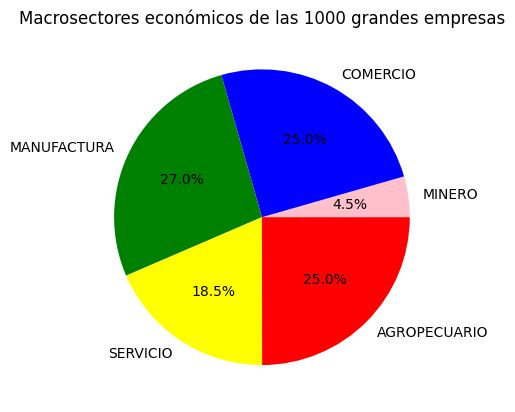

In [ ]:
#Diagrama Circular
categoria=['MINERO','COMERCIO','MANUFACTURA','SERVICIO', 'AGROPECUARIO']
plt.pie(aux,labels=categoria,autopct='%1.1f%%',colors=['pink','blue','green','yellow','red'])
plt.title('Macrosectores económicos de las 1000 grandes empresas')
plt.show()

**Analisis Gráfica 1** De acuerdo a la gráfica de torta se evidencia que la mayoria de las grandes mejores empresas en Colombia,pertenecen al sector de manufactura con un 27% de participación y en segundo lugar se posiciona la participación del sector del comercio con un 25%, sin embargo en Colombia el sector minero hay poca intervención en en el mercado para ser evaluado como las mejores empresas en Colombia ya que tiene solo un 4.5% de participación.

**Análisis del top 10 de las mejores empresas en Colombia**

In [ ]:
#Top 10 de las empresas
df_rsocial=df_empre[['razon_social']]
df_rsocial.head(10)

,razon_social
0,ECOPETROL S.A
1,ORGANIZACIÓN TERPEL S.A.
2,REFINERIA DE CARTAGENA S.A.S.
3,ALMACENES EXITO S A
4,EMPRESAS PÚBLICAS DE MEDELLÍN ESP
5,AEROVIAS DEL CONTINENTE AMERICANO S.A. - AVIAN...
6,COMUNICACIÓN CELULAR S.A.
7,NUEVA EPS S.A.
8,Cenit Transporte y Logística de Hidrocarburos ...
9,SUPERTIENDAS Y DROGUERIAS OLIMPICA S.A


In [ ]:
ingreso2018.head(10)

0    6.257985e+10
1    1.487944e+10
2    1.291943e+10
3    1.144449e+10
4    8.966811e+09
5    8.747169e+09
6    8.665791e+09
7    7.014037e+09
8    6.715703e+09
9    6.158207e+09
Name: ingresos_operacionales_2018, dtype: float64

In [ ]:
#Listado del top 10
#empresas=['ECOPETROL S.A', 'ORGANIZACIÓN TERPEL S.A','REFINERIA DE CARTAGENA S.A.S','ALMACENES EXITO S A',
#'EMPRESAS PÚBLICAS DE MEDELLÍN ESP','AEROVIAS DEL CONTINENTE AMERICANO S.A AVIAN','COMUNICACIÓN CELULAR S.A',
#'NUEVA EPS S.A','Cenit Transporte y Logística de Hidrocarburos','SUPERTIENDAS Y DROGUERIAS OLIMPICA S.A']

In [ ]:
#Crear un Dataframe en pandas'
df=pd.DataFrame()
#En el dataframe asignar los valores de ingresos de las 10 empresas en una lista
df['ingresos']=[62579849000,14879440281,12919431000,11444486000,8966811000,8747168000,8665791000,7014036000,6715702915,6158207111]
#Asignar la variable 'ingresos' al dataframe
ingresos=df['ingresos']

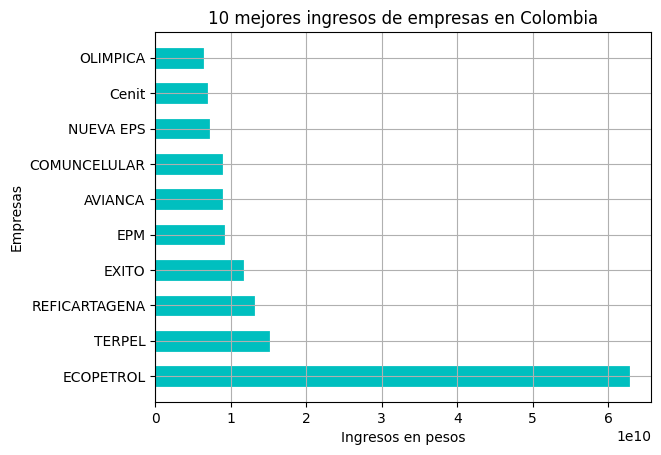

In [ ]:
#Diagrama de Barras
empresas=['ECOPETROL', 'TERPEL','REFICARTAGENA','EXITO',
'EPM','AVIANCA','COMUNCELULAR','NUEVA EPS','Cenit','OLIMPICA']
x=np.array(empresas)
y=np.array(ingresos)
plt.barh(x,y,height=0.5,color="c",edgecolor="c",linewidth=2)
plt.ylabel('Empresas')
plt.xlabel('Ingresos en pesos')
plt.title('10 mejores ingresos de empresas en Colombia')
plt.grid()
plt.show()



**Análisis gráfica 2:**

De acuerdo a los datos de la gráfica de Barras, se puede concluir que de las 10 mejores empresas de Colombia sus ingresos ascienden mas de los 6 mil millones de pesos para el 2018.

El ranking de las empresas es liderado por Ecopetrol, Terpel, La Refineria de Cartagena, Exito, EPM (Empresas públicas de Medellin), AVIAN, Comunicación Celular, Nueva Eps, Cenit (Transporte y Logística de Hidrocarburos) y Olimpica. Estas empresas pertenecen al sector de Mineria, Comercio, Manufactura y servicios.

Ecopetrol presenta una incremento abismal de sus ingresos con 62.579.849.000 millones de pesos, a diferencia de las otras grandes empresas presenta una diferencia de 47.700.408.719 millones de pesos. por ello se puede evidenciar que Ecopetrol es la empresa lider en Colombia, ya que uno de los sustentos más importantes de la economia en Colombia es el petróleo.


In [ ]:
df_rsocial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   razon_social  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


# 9.Se debe incluir mínimo una tabla pivote y una agrupación


In [ ]:
df_empre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   no                           1000 non-null   object
 1   nit                          1000 non-null   object
 2   razon_social                 1000 non-null   object
 3   supervisor                   1000 non-null   object
 4   regi_n                       1000 non-null   object
 5   departamento_domicilio       1000 non-null   object
 6   ciudad_domicilio             1000 non-null   object
 7   ciiu                         1000 non-null   object
 8   macrosector                  1000 non-null   object
 9   ingresos_operacionales_2018  1000 non-null   object
 10  ganancia_perdida_2018        1000 non-null   object
 11  total_activos_2018           1000 non-null   object
 12  total_pasivos_2018           1000 non-null   object
 13  total_patrimonio_2018        1000 

**Tabla pivote**

In [ ]:
df_empre.pivot_table(values='razon_social',index='macrosector',columns='ciiu',aggfunc='count')

ciiu,A0122 - Cultivo de plátano y banano,A0125 - Cultivo de flor de corte,A0144 - Cría de ganado porcino,A0145 - Cría de aves de corral,B0510 - Extracción de hulla (carbón de piedra),B0520 - Extracción de carbón lignito,B0610 - Extracción de petróleo crudo,B0620 - Extracción de gas natural,B0722 - Extracción de oro y otros metales preciosos,B0723 - Extracción de minerales de níquel,...,N8010 - Actividades de seguridad privada,N8020 - Actividades de servicios de sistemas de seguridad,N8129 - Otras actividades de limpieza de edificios e instalaciones industriales,N8220 - Actividades de centros de llamadas (Call center),N8299 - Otras actividades de servicio de apoyo a las empresas n.c.p.,O8430- Actividades de planes de seguridad social de afiliacion obligatoria,"Q8610 - Actividades de hospitales y clinicas, con internacion",Q8699- Otras actividades de atencion de la salud humana,S9511 - Mantenimiento y reparación de computadores y de equipo periférico,S9603 - Pompas fúnebres y actividades relacionadas
macrosector,,,,,,,,,,,,,,,,,,,,,
AGROPECUARIO,1.0,3.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMERCIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CONSTRUCCIÓN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MANUFACTURA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MINERO-HIDROCARBUROS,NaN,NaN,NaN,NaN,9.0,1.0,22.0,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SERVICIOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,1.0,3.0,8.0,4.0,25.0,2.0,14.0,1.0,1.0


**Agrupaciones**

Se filtran los datos con la función groupby cuantas empresas hay en los siguientes sectores:

In [ ]:
df_empre.groupby(df_empre['macrosector']).count()[['razon_social']]

,razon_social
macrosector,
AGROPECUARIO,24
COMERCIO,303
CONSTRUCCIÓN,66
MANUFACTURA,328
MINERO-HIDROCARBUROS,54
SERVICIOS,225


# 10. Todas las gráficas deben ser explicadas

In [ ]:
df_empre.head()

,no,nit,razon_social,supervisor,regi_n,departamento_domicilio,ciudad_domicilio,ciiu,macrosector,ingresos_operacionales_2018,ganancia_perdida_2018,total_activos_2018,total_pasivos_2018,total_patrimonio_2018,ingresos_operacionales_2017,ganancia_perdida_2017,total_activos_2017,total_pasivos_2017,total_patrimonio_2017,grupo_en_niif
0,1,899999068,ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,B0610 - Extracción de petróleo crudo,MINERO-HIDROCARBUROS,62579849000.00,11556405000.00,113761823000.00,56548216000.00,57213607000.00,49687082000.00,6620412000.00,107549026000.00,59650395000.00,47898631000.00,NIIF PLENAS-GRUPO 1
1,2,830095213,ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,G4661 - Comercio al por mayor de combustibles ...,COMERCIO,14879440281.00,133741350.00,5488095686.00,3525498461.00,1962597225.00,12493256560.00,195281207.00,3863475148.00,2186212118.00,1677263030.00,NIIF PLENAS-GRUPO 1
2,3,900112515,REFINERIA DE CARTAGENA S.A.S.,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,C1921 - Fabricación de productos de la refinac...,MANUFACTURA,12919431000.00,-802449716.00,27881794581.00,9121543502.00,18760251079.00,9150339475.00,48094664.00,26779627629.00,8612363110.00,18167264519.00,NIIF PLENAS-GRUPO 1
3,4,890900608,ALMACENES EXITO S A,SUPERFINANCIERA,Antioquia,ANTIOQUIA,ENVIGADO-ANTIOQUIA,G4711 - Comercio al por menor en establecimien...,COMERCIO,11444486000.00,279403000.00,15663349000.00,8013609000.00,7649740000.00,11250922000.00,217713000.00,15962702000.00,8123134000.00,7839568000.00,NIIF PLENAS-GRUPO 1
4,5,890904996,EMPRESAS PÚBLICAS DE MEDELLÍN ESP,SUPERSERVICIOS,Antioquia,ANTIOQUIA,MEDELLIN-ANTIOQUIA,D3513- Dsitribución de energía electrica,SERVICIOS,8966811000.00,2344822000.00,45595544000.00,22990219000.00,22605325000.00,7927149000.00,2188189000.00,39580960000.00,18082979000.00,21497981000.00,NIIF PLENAS-GRUPO 1


**Análisis de las mejores Empresas Caracterizadas por ciudades**

In [ ]:
#Se imprime las regiones de procedencia de cada empresa del dataframe

region=list(df_empre['regi_n'])
for i in region:
  print(i)

Bogotá - Cundinamarca
Bogotá - Cundinamarca
Costa Atlántica
Antioquia
Antioquia
Costa Atlántica
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Costa Atlántica
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Antioquia
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Costa Atlántica
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Costa Pacífica
Bogotá - Cundinamarca
Antioquia
Antioquia
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Antioquia
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Costa Atlántica
Bogotá - Cundinamarca
Bogotá - Cundinamarca
Antioquia
Bogotá - Cundinamarca
Eje Cafetero
Bogotá -

In [ ]:
#Contar las empresas que estan caracterizados por regiones del pais
def contar(n, vec):
  '''Para esta funcion n es el numero a contar y vec es la lista donde contar '''
  count=0
  for i in vec:
    if i==n:
      count+=1
  return count

print('El sector de Centro - Oriente hay: ',contar('Centro - Oriente', region))
print('El sector de Antioquia hay: ',contar('Antioquia', region))
print('El sector de Bogotá - Cundinamarca hay: ',contar('Bogotá - Cundinamarca', region))
print('El sector de Costa Atlántica hay: ',contar('Costa Atlántica', region))
print('El sector de Costa Pacífica hay: ',contar('Costa Pacífica', region))
print('El sector de Eje Cafetero hay: ',contar('Eje Cafetero', region))
print('El sector de Otros hay: ',contar('Otros', region))

aux1=[contar('Centro - Oriente', region), contar('Antioquia', region),contar('Bogotá - Cundinamarca', region),
     contar('Costa Atlántica ', region),contar('Costa Pacífica', region),contar('Eje cafetero', region),
     contar('otros', region)]
print('La suma total es de: ', sum(aux1))

El sector de Centro - Oriente hay:  30
El sector de Antioquia hay:  161
El sector de Bogotá - Cundinamarca hay:  555
El sector de Costa Atlántica hay:  98
El sector de Costa Pacífica hay:  127
El sector de Eje Cafetero hay:  22
El sector de Otros hay:  7
La suma total es de:  873


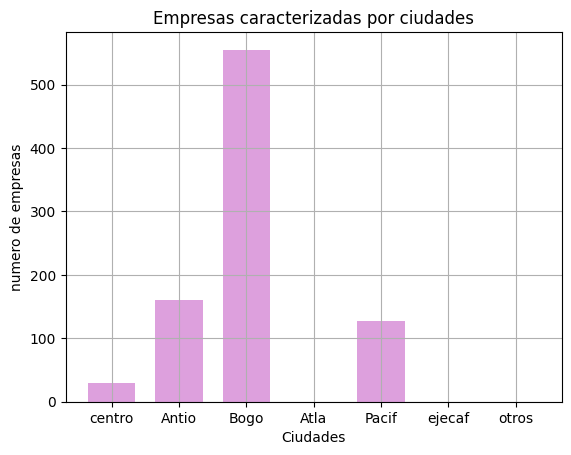

In [ ]:
#Diagrama de Barras
region=['centro','Antio','Bogo','Atla','Pacif','ejecaf','otros']
plt.bar(region,aux1,width=0.7, color='plum')
plt.xlabel('Ciudades')
plt.ylabel('numero de empresas')
plt.title('Empresas caracterizadas por ciudades')
plt.grid()
plt.show()

**Análisis gráfica 3**
De acuerdo a la gráfica de barras, se evidencia que las grandes ciudades del pais como Bogotá, Antioquia y la costa pacifica, son las ciudades con más empresas calificadas dentro del ranking en Colombia: Bogotá cuenta con 555 empresas, en la segunda posición se encuentra Antioquia con 161 empresas y la costa pacifica con 127 empresas.

Sin embargo, hay poca concentración en regiones mas alejadas como Santander, el Eje cafetero y la Costa Atlántica, una de las implicaciones podría ser por la falta de desarrollo económico,local y apoyo político en estas regiones.


**Análisis del Patrimonio de las mejores Empresas**

In [ ]:
#Convertir el patrimonio del dataframe a número
patrimonio2018=pd.to_numeric(df_empre['total_patrimonio_2018'],errors='coerce')
print(patrimonio2018)

0      5.721361e+10
1      1.962597e+09
2      1.876025e+10
3      7.649740e+09
4      2.260532e+10
           ...     
995    4.024027e+07
996    1.048353e+08
997    2.144031e+08
998    5.359001e+07
999    7.660408e+07
Name: total_patrimonio_2018, Length: 1000, dtype: float64


In [ ]:
# Media del patrimonio
df_empre.head()
var=list((df_empre['total_patrimonio_2018']))
patrimonio=[]
for i in range(len(var)):
  patrimonio.append(float(var[i]))

patrimonio_a=np.array(patrimonio)
print('La media de los modelos es: ', np.mean(patrimonio_a))

La media de los modelos es:  526425976.98415


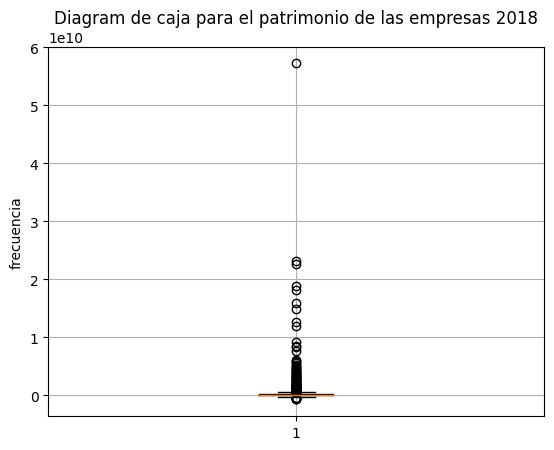

In [ ]:
#Diagrama de cajas y bigotes
plt.boxplot(patrimonio_a)
plt.title('Diagrama de caja para el patrimonio de las empresas 2018')
plt.ylabel('frecuencia')
plt.grid()
plt.show()

**Análisis gráfica 4**
De acuerdo a la gráfica de caja y bigotes, se evidencia que Ecopetrol presenta un dato atipico en su patrimonio, ya que al tener ingresos mayores a 62 mil millones de pesos, y mantener sus pasivos inferiores a los activos y ganancias, su patrimonio es alto con $57.213.607.000 millones de pesos.

Dentro del ranking en segundo lugar, se encuentra la empresa Terpel con un patrimonio de 1.962.597.225 millones de pesos  y en tercer lugar se encuentra la Refineria de Cartagena con 18.760.251.079 de patrimonio, estas dos empresas pertenecen al sector de Manufactura y Comercio.

La mayor concentración de las grandes empresas presentan un patrimonio entre 5 y 10 mil millones de pesos.